# CDO : Cas 5, Renault Nissan en Roumanie !
## Généralités

### Présentation générale du projet

A la suite de l'alliance Renault-Nissan, des bureaux d'études associés ont été installés en Corée et en Roumanie, pour assister la R&D directement à proximité des usines.

En Corée, tout fonctionne et les rendus sont dans les temps, et dans les normes. Pourtant, la situation ne coïncide pas en Roumanie, où les qualifications des employés sont insuffisantes, les turn-over trop importants, et où la situation semble inextricable.

Cette étude de cas consiste à mettre au point une stratégie tenant compte du faible nombre de ressources humaines disponibles en Roumanie pour atténuer ou résoudre les problèmes qui sévissent dans ce BEA.

### Contributeurs

Les contributeurs du projet Python sont : Moi-même.

## Coeur du projet
### Interprétation du problème
En fait, le problème d'implantation en Roumanie est une aggrégation de problèmes directement liés à la localité d'implantation. Tout d'abord, on se trouve dans un environnement dans lequel le turn over est extrêmement important (2/3 dans les 18 mois suivant l'embauche). Ce turn-over a pour conséquence le ralentissement des projets, le faible intérêt pour le travail entrepris, mais surtout la difficulté pour Renault-Nissan à faire monter en compétences ses propres acteurs, au risque s'ils réussissent à grimper de les voir partir peu de temps plus tard.

En outre, le problème de ressources humaines à disposition sur le territoire lui-même. Il pourrait être astucieux de remplacer immédiatement les employés sur le quai de départ par des experts de niveau similaire. Mais non ! Les personnels compétents sont en réalité indisponibles en quantité suffisante pour combler le turn-over évoqué précédemment. Ceci s'accompagne d'un manque d'intérêt assumé du chargé des BEA en Roumanie et Corée, qui à défaut d'avoir l'impression de pouvoir intervenir sur le cas de la Roumanie, a très nbien compris que les Coréens fournissaient du travail de qualité, et dans les temps. 

Renault-Nissan doit il faire l'impasse sur ce projet, vendre ses locaux et investir plus en Corée ? Certain diront "oui", d'autres "pas si sûr", car il semble effectivement que impossible d'appartient pas à notre champs lexical, et que ce projet, nous le faisons pour toi, Renault-Nissan !


### Hypothèses pour la modélisation

#### Généralités

On supposera dans un premier temps que le nombre d'employés total est de 68. On s'intéressera dans un deuxième temps au cas où ce nombre est augmenté à 150.

D'autre part, on supposera que chaque projet demande la participation d'un expert de niveau 3, 3 experts de niveau 2 (un dans chaque domaine) et 3 experts de niveau 1 (un pour assister chaque niveau 2) pour être mené à bien. On considère également que chaque projet demande 2 ans et 6 mois pour être mené à terme.

#### Sur les compétences

On admet que les grades de compétences s'atteignent naturellement sans investissement supplémentaire et de manière similaire pour les employés en suivant les critères suivants : 
- Niveau 1 atteint au bout de 6 mois (en école)
- Niveau 2 atteint au bout de 2 ans à partir du niveau 1, encadré par un tuteur de niveau 3
- Niveau 3 atteint au bout de 7 ans à partir du niveau 2, encadré par un tuteur de niveau 3 et 3 personnes de niveau 2

Chacune de ces compétences participe au bien-être de l'entreprise à hauteur de 1000 points pour le niveau 1, 2000 points pour le niveau 2 et 5000 points pour le niveau 3.

#### Sur le turn-over

Le nombre de projet par individu influence directement son bien-être, et donc le turn-over du site. On considère que 3 projets sont envisageables par personne, et que chaque projet supplémentaire avance le départ moyen des employés de 3 mois. 

Par ailleurs, on s'attachera à considérer que le bien-être des acteurs roumains peut être augmenté à l'aide d'investissement constant brut et au bénéfice de tous les employés. Notamment, on considèrera que ces augmentations de bien-être influencent directement le turn-over à raison de 6 mois de retard pour les départs en moyenne pour 5000e dépensés.

On considère que les probabilités de turn-over dépendent de l'ancienneté dans l'entreprise, et notamment que l'espérance sans modificateur est obtenue selon la répartition suivante : 

- Niveau 1 : 12 mois
- Niveau 2 : 24 mois
- Niveau 3 : 36 mois

#### Sur les coûts

On considèrera dans les coûts que les salaires sont les suivants (salaires moyens pour le travail effectué avec ce niveau d'expertise observés en Roumanie).

- Niveau 1 : 1450e par mois
- Niveau 2 : 1750e par mois
- Niveau 3 : 2100e par mois

En plus de ces coûts mensuels, l'entreprise peut décider de dépenser 5000e pour augmenter l'espérance du nombre de mois de départ après embauche des employés de 6 mois.

### Un premier aperçu de la perrenité de la situation actuelle

Observons dans un premier temps, avec la configuration actuelle, le turn-over de 18 mois et une répartition standard d'employés (au nombre de 68) l'évolution de la situation au fil du temps sur ces mêmes employés et sur les compétences au sein de l'organisation (sans hypothèse supplémentaire).

On part de la répartition pour laquelle on a, pour 26 projets, 13 niveaux 3, 20 niveaux 2 et 35 niveaux 1.

Au bout de 18 mois, si on n'a pas de stratégie de réemploi, les 2/3 des employés sont partis. Sans renouvellement des effectifs, on n'a plus les ressources humaines pour terminer les projets en cours, aucun projet n'étant terminé en moins de 18 mois.

On suppose donc que les possibilités de réembauche sont les suivantes : on peut embaucher des niveaux 1 n'importe quand, on peut embaucher 3 niveaux 2 tous les 6 mois et on peut embaucher 2 niveau 3 tous les ans.

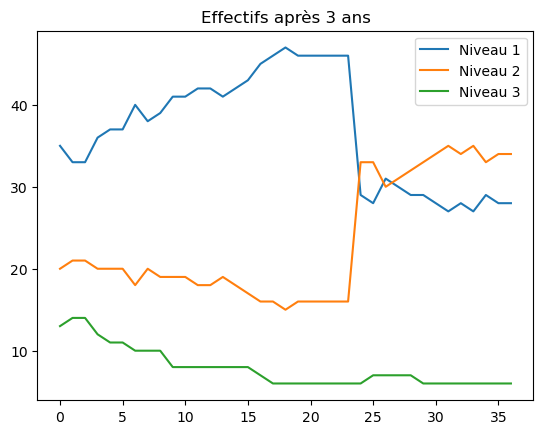

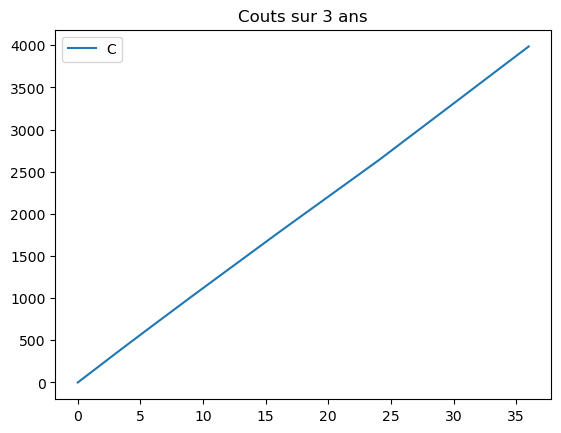

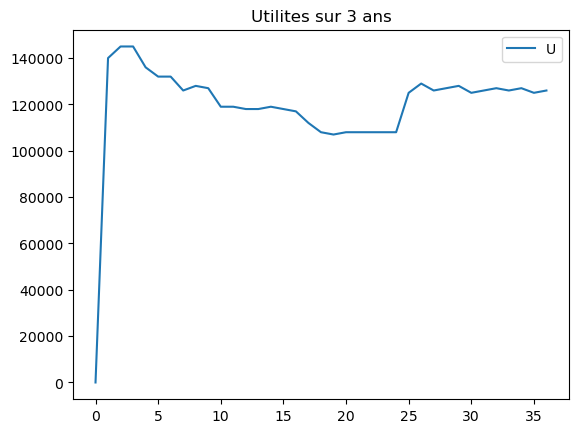

In [93]:
import random
import matplotlib.pyplot as plt

x1 = [0 for i in range(2*12)]
x2 = [0 for i in range(7*12)]    

x1[0] = 35
x2[0] = 20
x3 = 13

t = [2/(3*18), 2/(3*18), 2/(3*18)]
T = 0
duree = 3*12

def depart_mois_suivant(x1,x2,x3,t):
    y1 = [0]
    for i in range(2*12):
        for j in range(x1[i]):
            c = 0
            p = random.random()
            if p<t[0]:
                c+=1
            x1[i]-=c
        if i!= 2*12-1:
            y1.append(x1[i])
            
    y2 = [x1[-1]]
    
    for i in range(7*12):
        for j in range(x2[i]):
            c = 0
            p = random.random()
            if p<t[1]:
                c+=1
            x2[i]-=c
        if i!= 7*12-1:
            y2.append(x2[i])
    
    for j in range(x3):
            c = 0
            p = random.random()
            if p<t[2]:
                c+=1
            x3-=c
    
    y3 = x2[-1] + x3
    
    return y1,y2,y3

def effectifs_apres_departs(x1,x2,x3,t,duree=3*12,remplacement = True, disp = False, cout = [1.450,1.750,2.100], calcul_cout = False, utilite = [1000,2000,5000], calcul_utilite = False):
    
    y = [[x1[0]],[x2[0]],[x3]]
    
    cout_total = 0
    couts = [0]
    
    utilite_totale = 0
    utilites = [0]
    
    for mois in range(duree):
        
        cout_total += sum(x1)*cout[0] + sum(x2)*cout[1] + x3*cout[2]
        couts.append(cout_total)
        
        utilite_totale = sum(x1)*utilite[0] + sum(x2)*utilite[1] + x3*utilite[2]
        utilites.append(utilite_totale)
        
        x1,x2,x3 = depart_mois_suivant(x1,x2,x3,t)
        if remplacement : 
            if mois%6==0 :
                x2[0]+=2
            if mois%12 == 0:
                x3 += 1
            x1[0]+= 68 - sum(x1) - sum(x2) - x3

        y[0].append(sum(x1))
        y[1].append(sum(x2))
        y[2].append(x3)
       
    res = [x1,x2,x3]
        
    if disp : 
        plt.figure()
        plt.title('Effectifs après 3 ans')
        plt.plot(range(duree+1), y[0]), plt.plot(range(duree+1), y[1]), plt.plot(range(duree+1), y[2])
        plt.legend(['Niveau 1', 'Niveau 2', 'Niveau 3'])
        if calcul_cout:    
            plt.figure()
            plt.title('Couts sur 3 ans')
            plt.plot(range(duree+1), couts)
            plt.legend('Cout cumulé')
        if calcul_utilite :
            plt.figure()
            plt.title('Utilites sur 3 ans')
            plt.plot(range(duree+1), utilites)
            plt.legend('Utilite cumulée')
        
    if calcul_cout : 
        res.append(cout_total)
    if calcul_utilite : 
        res.append(utilite_totale)
    return res


L = effectifs_apres_departs(x1,x2,x3,t,remplacement=True,duree=3*12,disp = True, calcul_cout = True, calcul_utilite = True)

### Une approche par aggrégation de fonctions objectifs

La première approche consiste à calculer les fonctions objectifs associées aux coûts, au turn-over et au compétences et d'obtenir les situations optimales pour chaque fonctions, puis pour l'aggrégation des trois. 

On s'intéresse tout d'abord au coût cumulé sur 3 ans, puisque les salaires sont des couts sur la durée et les dépenses de bien être des coûts fixes.

In [94]:
def fonction_cout(x1,x2,x3,C,turnover = [12,24,36],duree=3*12):
    #x1, x2, x3 les répartitions initiales d'expertise
    #C le prix dépensé pour l'augmentation du bien-être
    #turnover la durée moyenne avant départ après embauche en comptant les charges des projets pour chaque niveau
    #duree la durée sur laquelle on évalue le coût (ici 3 ans)
    p = C//5000
    
    
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
    
    cout_cumul_employes = effectifs_apres_departs(x1,x2,x3,t,duree=3*12,disp = False, calcul_cout = True)[3]
    return cout_cumul_employes + C
    
fonction_cout(x1,x2,x3,5000,turnover = [12,24,36],duree=3*12)

8945.449999999999

En ce qui concerne les compétences, on décide d'attribuer pour chaque compétence une valeur d'utilité pour l'entreprise. En l'occurence, on a décidé précédemment que chacune de ces compétences participe au bien-être de l'entreprise à hauteur de 1000 points pour le niveau 1, 2000 points pour le niveau 2 et 5000 points pour le niveau 3. On ne s'intéresse pas cette fois à l'utilité cumulée (autrement une situation dans laquelle on a beaucoup d'employés au début qui partent très vite pourrait maximiser l'utilité cumulée). On s'intéresse plutôt au résultat, en terme de compétences, au bout d'une durée donnée.

In [123]:
def fonction_utilite(x1,x2,x3,C,turnover = [12,24,36],duree=3*12, utilite =[1000,2000,5000] ):
    p = C//5000
    
    
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
    
    L = effectifs_apres_departs(x1,x2,x3,t,remplacement=True,duree=3*12,disp = False, calcul_utilite = True, utilite = utilite)
    return L[3]

fonction_utilite(x1,x2,x3,0)

117000

### Première interprétation

Ces deux premières modélisation permettent déjà d'obtenir des résultats intéressants. Par exemple, intéressons nous à la fonction d'utilité : on constate qu'à toute autre variable fixée, l'introduction d'un coût fixe pour augmenter le bien être permet d'augmenter significativement l'utilité de l'entreprise (sous les hypothèses fixées au départ).

Ceci est assez cohérent avec l'idée recherchée initiale : une différence de 6 mois dans le nombre de mois moyen avant départ permet de gagner du temps sur l'embauche des recrues de remplacement, mais aussi de former plus de personnels dans des niveaux d'expertise plus élevés.

### Optimisation par minimisation d'une fonction

Désormais, on va s'intéresser à minimiser les coûts en maximisant l'utilité de l'entreprise. On va notamment imposer le nombre total de 68 personnes, puis le nombre total de 150 personnes à la fin de la 3e année. On impose également que le nombre de niveau 3 doive être supérieur à 6 dans l'entreprise à tout instant, et que le nombre d'employé de niveau 2 doive être supérieur à 15 à tout instant. Ces nombres sont évidemment arbitraires et peuvent être choisis autrement.



In [410]:
def fonction_objectif(C):
    
    x1 = [0 for i in range(2*12)]
    x2 = [0 for i in range(7*12)]    

    x1[0] = 29
    x2[0] = 26
    x3 = 13
    
    turnover = [12,24,36]
    p = C//5000
        
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
        
    [x1,x2,x3] = effectifs_apres_departs(x1,x2,x3,t,disp = False)
    
    return fonction_cout(x1,x2,x3,C)-fonction_utilite(x1,x2,x3,C)

print(fonction_objectif(20000))

-112792.65


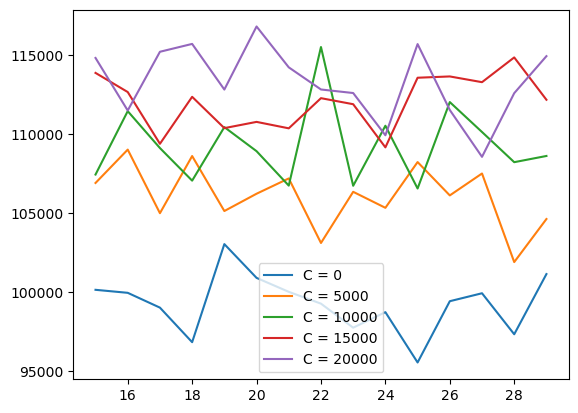

In [462]:
def fonction_objectif_repartition(x,C):
    
    x1 = [0 for i in range(2*12)]
    x2 = [0 for i in range(7*12)]   
    
    x1[0] = 68-x-13
    x2[0] = x
    x3 = 13
    
    turnover = [12,24,36]
    p = C//5000
        
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
        
    [x1,x2,x3] = effectifs_apres_departs(x1,x2,x3,t,disp = False)
    
    return fonction_utilite(x1,x2,x3,C)-fonction_cout(x1,x2,x3,C)

leg = []

for C in [0,5000,10000,15000,20000]:
    L = []
    for x in range(15,30):
        f = sum([fonction_objectif_repartition(x,C) for i in range(10)])/10
        L.append(f)

    plt.plot(range(15,30),L)
    leg.append('C = ' + str(C))
    plt.legend(leg)

En fixant le nombre de niveau 3 initial (ressource rare), et en fixant le nombre de travailleurs à 68, on voit que peu importe le nombre de niveaux 2 recrutés, l'investissement dans le bien être donne une utilité supérieure au cas où l'investissement n'est pas fait.

Evidemment, ce résultat peut changer en fonction de l'importance que l'on attache au coût et à l'utilité. Si on donne une grande importance au coût, on trouve notamment l'inverse. Si on donne peu d'importance au coût, on aura une grande distinction entre les utilités en fonction des investissements bien-être.

Dans le cas où le total des travailleurs est 150, on peut considérer que les embauches sont continues, avec 82 embauches à répartir sur 3 ans, en plus du remplacement des départs. On peut imaginer alors 2 travailleurs de niveaux 1 embauchés tous les mois, 1 niveaux 2 embauché tous les 6 mois et 1 niveau 3 embauché par an (on obtient 149 employés).

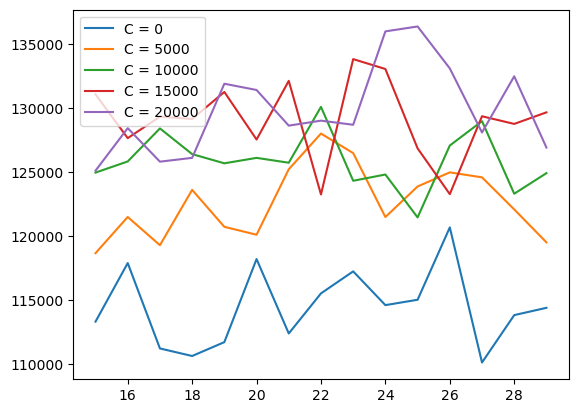

In [467]:
def effectifs_apres_departs_embauche(x1,x2,x3,t,duree=3*12,remplacement = True, disp = False, cout = [1.450,1.750,2.100], calcul_cout = False, utilite = [1000,2000,5000], calcul_utilite = False):
    
    y = [[x1[0]],[x2[0]],[x3]]
    
    cout_total = 0
    couts = [0]
    
    utilite_totale = 0
    utilites = [0]
    
    for mois in range(duree):
        
        cout_total += sum(x1)*cout[0] + sum(x2)*cout[1] + x3*cout[2]
        couts.append(cout_total)
        
        utilite_totale = sum(x1)*utilite[0] + sum(x2)*utilite[1] + x3*utilite[2]
        utilites.append(utilite_totale)
        
        x1,x2,x3 = depart_mois_suivant(x1,x2,x3,t)
        if remplacement : 
            if mois%6==0 :
                x2[0]+=2
            if mois%12 == 0:
                x3 += 1
            x1[0]+= 68 - sum(x1) - sum(x2) - x3
            
        if mois%6==0 :
                x2[0]+=2
        if mois%12 == 0:
            x3 += 1
        x1[0]+= 2

        y[0].append(sum(x1))
        y[1].append(sum(x2))
        y[2].append(x3)
       
    res = [x1,x2,x3]
        
    if disp : 
        plt.figure()
        plt.title('Effectifs après 3 ans')
        plt.plot(range(duree+1), y[0]), plt.plot(range(duree+1), y[1]), plt.plot(range(duree+1), y[2])
        plt.legend(['Niveau 1', 'Niveau 2', 'Niveau 3'])
        if calcul_cout:    
            plt.figure()
            plt.title('Couts sur 3 ans')
            plt.plot(range(duree+1), couts)
            plt.legend('Cout cumulé')
        if calcul_utilite :
            plt.figure()
            plt.title('Utilites sur 3 ans')
            plt.plot(range(duree+1), utilites)
            plt.legend('Utilite cumulée')
        
    if calcul_cout : 
        res.append(cout_total)
    if calcul_utilite : 
        res.append(utilite_totale)
    return res

def fonction_cout_embauche(x1,x2,x3,C,turnover = [12,24,36],duree=3*12):
    #x1, x2, x3 les répartitions initiales d'expertise
    #C le prix dépensé pour l'augmentation du bien-être
    #turnover la durée moyenne avant départ après embauche en comptant les charges des projets pour chaque niveau
    #duree la durée sur laquelle on évalue le coût (ici 3 ans)
    p = C//5000
    
    
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
    
    cout_cumul_employes = effectifs_apres_departs_embauche(x1,x2,x3,t,duree=3*12,disp = False, calcul_cout = True)[3]
    return cout_cumul_employes + C

def fonction_utilite_embauche(x1,x2,x3,C,turnover = [12,24,36],duree=3*12, utilite =[1000,2000,5000] ):
    p = C//5000
    
    
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
    
    L = effectifs_apres_departs_embauche(x1,x2,x3,t,remplacement=True,duree=3*12,disp = False, calcul_utilite = True, utilite = utilite)
    return L[3]

def fonction_objectif_embauche(C):
    
    x1 = [0 for i in range(2*12)]
    x2 = [0 for i in range(7*12)]    

    x1[0] = 29
    x2[0] = 26
    x3 = 13
    
    turnover = [12,24,36]
    p = C//5000
        
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
        
    [x1,x2,x3] = effectifs_apres_departs_embauche(x1,x2,x3,t,disp = False)
    
    return fonction_cout_embauche(x1,x2,x3,C)-fonction_utilite_embauche(x1,x2,x3,C)


def fonction_objectif_repartition_embauche(x,C):
    
    x1 = [0 for i in range(2*12)]
    x2 = [0 for i in range(7*12)]   
    
    x1[0] = 68-x-13
    x2[0] = x
    x3 = 13
    
    turnover = [12,24,36]
    p = C//5000
        
    t1 = 1/(turnover[0] + p*6)
    t2 = 1/(turnover[1] + p*6)
    t3 = 1/(turnover[2] + p*6)
    t = [t1,t2,t3]
        
    [x1,x2,x3] = effectifs_apres_departs_embauche(x1,x2,x3,t,disp = False)
    
    return fonction_utilite_embauche(x1,x2,x3,C)-fonction_cout_embauche(x1,x2,x3,C)

leg = []

for C in [0,5000,10000,15000,20000]:
    L = []
    for x in range(15,30):
        f = sum([fonction_objectif_repartition_embauche(x,C) for i in range(10)])/10
        L.append(f)

    plt.plot(range(15,30),L)
    leg.append('C = ' + str(C))
    plt.legend(leg)

On n'a pas tenu compte ici des contraintes d'effectifs pour les niveaux 2 et niveaux 3, mais on peut vérifier la cohérence en traçant les effectifs pour chaque situation.

Plus généralement, on s'intéresse dans la partie suivante à ce cas là et à la recherche de stabilité pour les compétences (voir l'amélioration de ces compétences).

### Une approche par la recherche de stabilité

La seconde approche consiste à estimer les effectifs dans chaque niveau d'expertise, en tenant compte de la difficulté à employer des personnes de niveau 2 et 3, de sorte à entretenir ou faire augmenter le niveau de compétences global de l'entreprise au fil du temps.

Si on prend l'exemple précédent, avec des effectifs initiaux de 22 niveaux 2, avec un investissement bien-être de 10000, on obtient l'évolution suivante : 

Niveaux 1 : 20
Niveaux 2 : 40
Niveaux 3 : 10


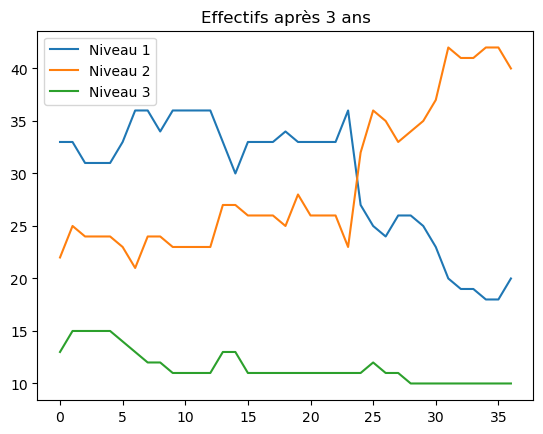

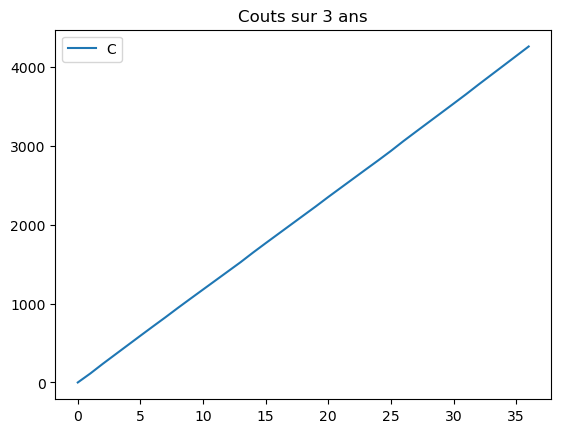

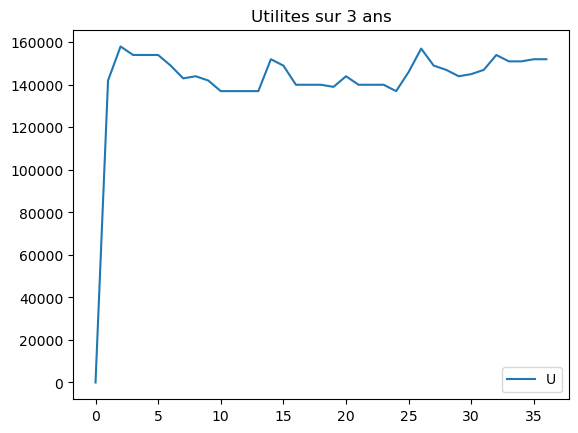

In [479]:
C = 10000
p = C//5000
turnover = [12,24,36]

t1 = 1/(turnover[0] + p*6)
t2 = 1/(turnover[1] + p*6)
t3 = 1/(turnover[2] + p*6)
t = [t1,t2,t3]

x1 = [0 for i in range(2*12)]
x2 = [0 for i in range(7*12)]   

x1[0] = 33
x2[0] = 22
x3 = 13

L = effectifs_apres_departs_embauche(x1,x2,x3,t,remplacement=True,duree=3*12,disp = True, calcul_cout = True, calcul_utilite = True)

print('Niveaux 1 : '+ str(sum(L[0])))
print('Niveaux 2 : '+ str(sum(L[1])))
print('Niveaux 3 : ' + str(L[2]))

On constate que pour un investissement de 10000€, on a une utilité en compétence stable dans le temps, avec une légère diminution des niveaux 3 au bout de 3 ans et une augmentation de niveaux 2 en raison d'une augmentation du bien être de sorte à ce que le nombre de mois moyen avant départ des employés de niveau 1 soit supérieur au temps nécessaire au passage au niveau 2.